<a href="https://colab.research.google.com/github/xyvlin/machine_learning_hw/blob/main/logisticRegressionAND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion
from sklearn.linear_model import LogisticRegression

In [ ]:
X = np.array([
    [0, 0], [0, 1], [1, 0], [1, 1],
    [0, 0], [1, 1], [0, 1], [1, 0],
    [1, 1], [0, 0], [0, 1], [1, 0],
    [0, 0], [1, 1], [1, 1]])
y = np.array([0, 0, 0, 1,
        0, 1, 0, 0,
        1, 0, 0, 0,
        0, 1, 1])
X_test = np.array([[0, 1], [1, 1], [1, 0], [0, 0]])
y_test = np.array([0, 1, 0, 0])

In [ ]:
class logisticRegression:
  def __init__(self,learningRate,convergeThreshold,maxIter):
    self.learningRate=learningRate
    self.convergeThreshold=convergeThreshold
    self.maxIter=maxIter
  def sigmoid(self,z):
    return 1/(1+np.exp(-z))
  def fit(self,X,y):
    N=X.shape[0]
    d=X.shape[1]
    X=np.c_[X,np.ones(N)]
    self.w = np.random.uniform(-0.01,0.01,size=d+1)
    for _ in range(self.maxIter):
      delta = np.zeros(d+1)
      for t in range(N):
        o=np.dot(self.w,X[t,:])
        pred_y=self.sigmoid(o)
        delta=delta+np.dot(X[t,:],(y[t]-pred_y))
      self.w+=self.learningRate*delta
      if np.linalg.norm(delta)<self.convergeThreshold:
        break
  def predict(self,x):
    N=x.shape[0]
    x = np.c_[x, np.ones(N)]
    y_pred=np.zeros(N)
    for t in range(N):
      o=np.dot(self.w,x[t,:])
      prob=self.sigmoid(o)
      y_pred[t]=1 if prob>=0.5 else 0
    return y_pred

In [ ]:
lr = logisticRegression(learningRate=0.01, convergeThreshold=0.0001, maxIter=1000)
lr.fit(X, y)
y_pred = lr.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
y_pred

Accuracy: 1.000


array([0., 1., 0., 0.])

<ipython-input-202-6704a36727ca>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],


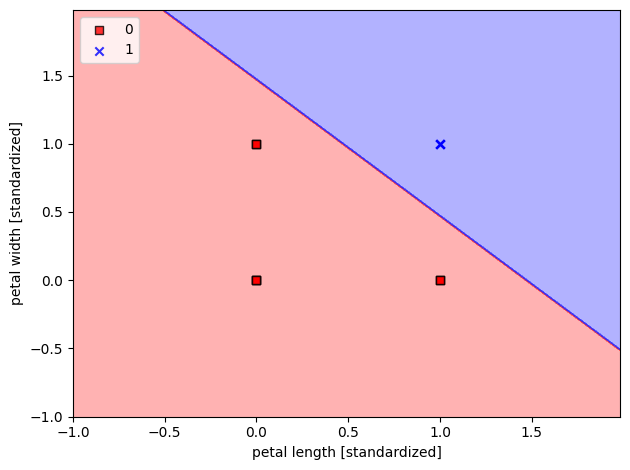

In [ ]:
# Graphing function from the textbook
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],
          alpha=0.8,color=colors[idx],
          marker=markers[idx],label=cl,
          edgecolor='black')
  # highlight test examples
  if test_idx:
    # plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]
    if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
      plt.scatter(X_test[:, 0],X_test[:, 1],
            c='',edgecolor='black',
            alpha=1.0,linewidth=1,
            marker='o',s=100,
            label='test set')
    else:
      plt.scatter(X_test[:, 0],X_test[:, 1],
            c='none',edgecolor='black',
            alpha=1.0,linewidth=1,
            marker='o',s=100,
            label='test set')
plot_decision_regions(X=X, y=y,classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
sklr = LogisticRegression()
sklr.fit(X, y)
y_pred = sklr.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
y_pred

Accuracy: 1.000


array([0, 1, 0, 0])

<ipython-input-202-6704a36727ca>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],


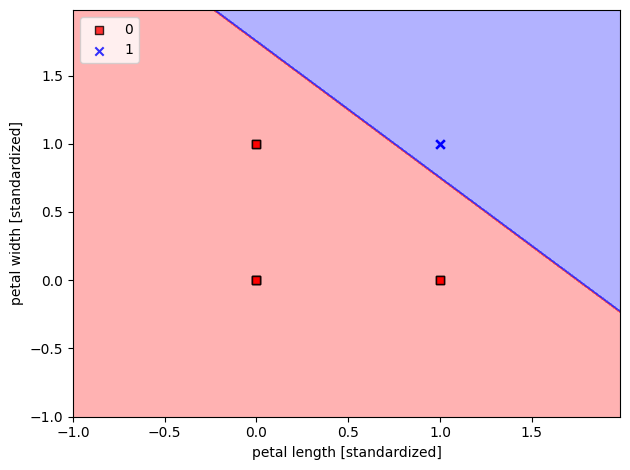

In [ ]:
plot_decision_regions(X=X, y=y,classifier=sklr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()